## HW2 | KNN Graph Instruction

#### 1. Fill in all code (under # put your code here)

#### 2. Must use Pandas or Numpy if there is an instruction 

#### 3. Generate the plot that is exactly the same as the table right after each code block

#### 4. Answer the question at the end of this jupyter notebook


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Swiss Banknote Dataset

Six variables measured on 100 genuine and 100 counterfeit old Swiss 1000-franc
bank notes. The data stem from Flury and Riedwyl (1988). The columns correspond
to the following one label and six variables:

0. Conterfeit - 0: genuine bank notes、1: genuine bank notes (Labels)


1. Length - Length of the bank note


2. Left - Height of the bank note, measured on the left


3. Right - Height of the bank note, measured on the right


4. Bottom - Distance of inner frame to the lower border


5. Top - Distance of inner frame to the upper border


6. Diagonal - Length of the diagonal



More details: [Kaggle | Swiss banknote conterfeit detection](https://www.kaggle.com/chrizzles/swiss-banknote-conterfeit-detection)

In [3]:
# Use [Pandas] to import data | banknotes.csv
# Put your code here 

bank = pd.read_csv('banknotes.csv')
label = bank.conterfeit

bank.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [4]:
# Use [Numpy function] to stack the following columns
# The 5-th column "Bottom" as X, the 6-th column "Top" as Y
# Put your code here
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
data_xy = np.array(bank[["Bottom","Top"]],dtype=float)
data_xy
#plt.scatter(data_xy[:,0],data_xy[:,1])

array([[ 9.000,  9.700],
       [ 8.100,  9.500],
       [ 8.700,  9.600],
       [ 7.500,  10.400],
       [ 10.400,  7.700],
       [ 9.000,  10.100],
       [ 7.900,  9.600],
       [ 7.200,  10.700],
       [ 8.200,  11.000],
       [ 9.200,  10.000],
       [ 7.900,  11.700],
       [ 7.700,  10.500],
       [ 7.900,  10.800],
       [ 7.700,  10.900],
       [ 7.700,  10.800],
       [ 9.300,  8.500],
       [ 8.200,  9.800],
       [ 9.000,  9.000],
       [ 7.400,  11.500],
       [ 8.600,  10.000],
       [ 8.400,  10.000],
       [ 8.100,  10.300],
       [ 8.400,  10.800],
       [ 8.700,  10.000],
       [ 7.400,  10.800],
       [ 8.000,  11.000],
       [ 8.900,  9.800],
       [ 9.800,  9.500],
       [ 7.400,  10.500],
       [ 8.300,  9.000],
       [ 7.900,  10.700],
       [ 8.600,  9.100],
       [ 7.700,  10.500],
       [ 8.400,  10.300],
       [ 8.900,  10.600],
       [ 9.400,  9.700],
       [ 8.400,  9.700],
       [ 7.900,  10.000],
       [ 8.500,  9.300],


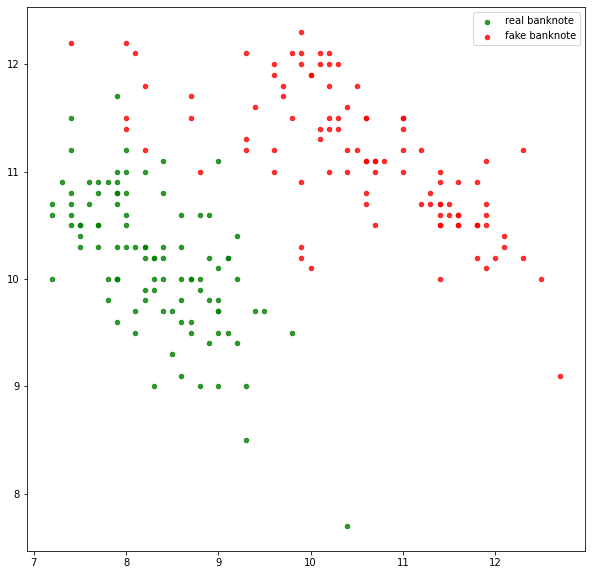

In [5]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here
#將np 和pandas結合後製出需要的array
index_0 = bank[["Bottom","Top",'conterfeit']]
index_0 =index_0[index_0['conterfeit']==0]
index_0=np.array(index_0)
index_1 = bank[["Bottom","Top",'conterfeit']]
index_1 =index_1[index_1['conterfeit']==1]
index_1=np.array(index_1)


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter 
# Remember to put on grid and legend and equal axis
# Put your code here

plt.figure(figsize = (10, 10))
plt.scatter(index_0[:,0],index_0[:,1],c='green',s=20, alpha=0.8,label='real banknote')
plt.scatter(index_1[:,0],index_1[:,1],c='red',s=20, alpha=0.8,label='fake banknote')
plt.legend(labels=['real banknote','fake banknote'])

In [6]:
# Use [Numpy function] to calculate the squared distance matrix between each points
# Put your code here
def dis(x,y):
    new=np.array(x)-np.array(y)
    return((np.array(new[0]))**2+(np.array(new[1]))**2)
temp=[]
dist_sq = []
dis(data_xy[0],data_xy[1])
for i in range(len(data_xy)):
    for j in range(len(data_xy)):
        temp.append(dis(data_xy[i],data_xy[j]))
    dist_sq.append(temp)
    temp=[]
dist_sq=np.array(dist_sq)
dist_sq

array([[ 0.000,  0.850,  0.100, ...,  4.520,  7.090,  4.680],
       [ 0.850,  0.000,  0.370, ...,  8.810,  12.500,  8.410],
       [ 0.100,  0.370,  0.000, ...,  5.860,  8.810,  5.860],
       ...,
       [ 4.520,  8.810,  5.860, ...,  0.000,  0.370,  0.320],
       [ 7.090,  12.500,  8.810, ...,  0.370,  0.000,  1.090],
       [ 4.680,  8.410,  5.860, ...,  0.320,  1.090,  0.000]])

In [44]:
##########TESTTTTTTTTTTTTT
sort=np.array(dist_sq)
sort.sort(axis=1)
ans=[]
temp=[]
for i in range(len(sort)):
    temp=[]
    for j in range(1,4): 
        dist=sort[i][j]
        #print(dist)
        for k in range(1,len(dist_sq[i])):
            if dist_sq[i][k]==dist:
                #print(i,k,dist_sq[i][k])
                temp.append(data_xy[k])
                break
    ans.append(temp)

In [36]:
def nearest_partition(dist_sq, K):
    K+=1
    #先分類
    sort=np.array(dist_sq)
    sort.sort(axis=1)
    ans=[]
    temp=[]
    #這邊透過迴圈 找出最接近的數的address,然後再將值回傳到原array後return
    for i in range(len(sort)):
        temp=[]
        for j in range(1,K+1): 
            dist=sort[i][j]
            #print(dist)
            for k in range(1,len(dist_sq[i])):
                if dist_sq[i][k]==dist:
                    #print(i,k,dist_sq[i][k])
                    temp.append(data_xy[k])
                    break
        ans.append(temp)
    
    return ans
#nearest_partition(dist_sq, 3)

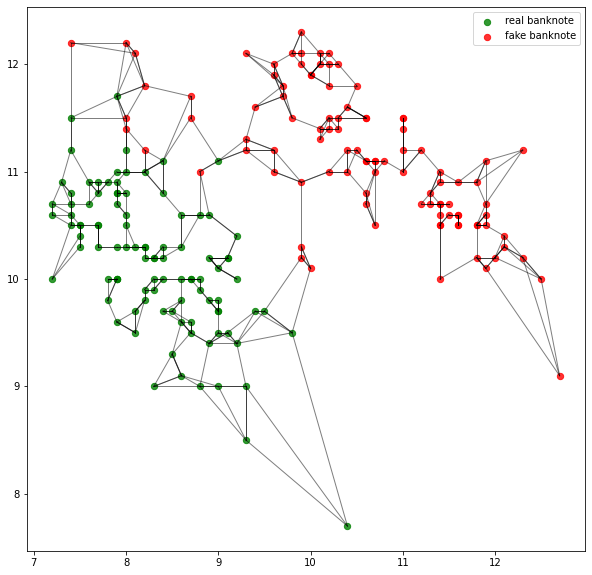

In [34]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here
#將np 和pandas結合後製出需要的array
index_0 = bank[["Bottom","Top",'conterfeit']]
index_0 =index_0[index_0['conterfeit']==0]
index_0=np.array(index_0)
index_1 = bank[["Bottom","Top",'conterfeit']]
index_1 =index_1[index_1['conterfeit']==1]
index_1=np.array(index_1) 


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here

plt.figure(figsize = (10, 10))
plt.scatter(index_0[:,0],index_0[:,1],c='green',s=40, alpha=0.8,label='real banknote')
plt.scatter(index_1[:,0],index_1[:,1],c='red',s=40, alpha=0.8,label='fake banknote')
plt.legend(labels=['real banknote','fake banknote'])

        
# Draw lines from each point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put your code here

K = 3
#做出點對點圖
ans=nearest_partition(dist_sq, K)
#plt.plot(*zip(ans[0][0], ans[0][1]), color = 'blue')
for i in range(len(data_xy)):
    for j in range(K):
            plt.plot(*zip(data_xy[i], ans[i][j]),color='black', linewidth=1, alpha=0.5)

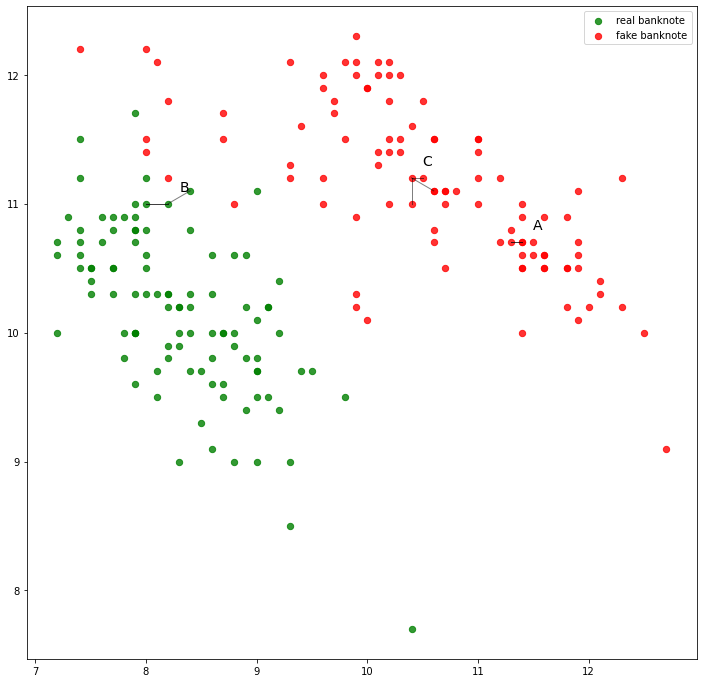

In [47]:
# Set seed = 10 | Random select three dots from data_xy
# Save dots index in varible "target" 
# Don't need to change below three lines

random.seed(10)
target = np.array([random.randint(0, len(data_xy)) for i in range(3)])
#print(target)
text = ['A', 'B', 'C']


# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = bank[["Bottom","Top",'conterfeit']]
index_0 =index_0[index_0['conterfeit']==0]
index_0=np.array(index_0)
index_1 = bank[["Bottom","Top",'conterfeit']]
index_1 =index_1[index_1['conterfeit']==1]
index_1=np.array(index_1) 


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red | Target → color = blue
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here

# Draw lines from the selected three point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put text A, B, C on each dots (location: Right + 0.1、 Up + 0.1)
# Put your code here
plt.figure(figsize = (12, 12))
plt.scatter(index_0[:,0],index_0[:,1],c='green',s=40, alpha=0.8,label='real banknote')
plt.scatter(index_1[:,0],index_1[:,1],c='red',s=40, alpha=0.8,label='fake banknote')
plt.legend(labels=['real banknote','fake banknote'])


K = 3
#做出特殊點對點圖
ans=nearest_partition(dist_sq, K)
for i in range(len(text)):
    for j in range(K):
            plt.plot(*zip(data_xy[target[i]], ans[target[i]][j]),color='black', linewidth=1, alpha=0.5)
    plt.text(data_xy[target[i]][0]+0.1, data_xy[target[i]][1]+0.1,str(text[i]),fontsize=14)


### Question：由上圖進行判斷，回答 ABC 三點各自被 KNN 分為哪一群，並說明原因。

### Your Answer：A,C被分在fake banknote B被分在real banknote, 因為根據KNN=3的定義 會尋找最接近的三個點並判斷哪些是多數後就分入群中

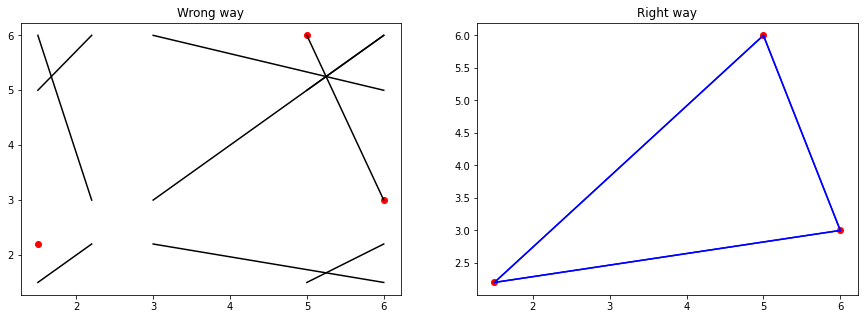

In [48]:
# Hint: How to drow a line between two dots

dots = np.array([[1.5, 2.2], [6, 3], [5, 6]])

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Wrong way')        
for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(dots[i], dots[j], color = 'black')

plt.subplot(122)
plt.title('Right way')

for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(*zip(dots[i], dots[j]), color = 'blue')